Variables/Columns
Antiseptic   (1=Post-Discovery,0=Pre-discovery)
Death       (1=Yes,0=No)
Count      (Number of cases)


,antiseptic,death,count
0,1,1,1
1,1,0,11
2,0,1,6
3,0,0,6


,died,survived
post_discovery,1,11
pre_discovery,6,6



Manually calculated chi-square = 8.333333333333334
P-value = 0.0038924171227786575 

scipy.stats chi square statistic: 8.333333333333334
P-value: 0.003892417122778637

The distribution of observed frequencies was significantly different to that predicted by the null hypothesis (of independence).

Manually calculated Cramer's V: 0.5892556509887896


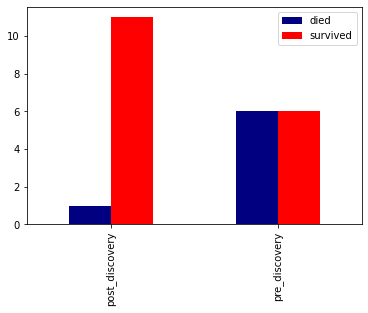

In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

# data obtained from http://users.stat.ufl.edu/~winner/data/lister_ul.dat

# information from data (from http://users.stat.ufl.edu/~winner/data/lister_ul.txt):

# " Description: Results on survival of Upper Limb amputees prior to and
# after discovery and use of antiseptic.''

# Dataset:  lister_ul.dat
# Source: Lister (1870). Effects of the Antiseptic System of Treatment
# Upon the Salubrity of a Surgical Hospital. The Lancet, 1:4-6,40-42.

# Variables/Columns
# Antiseptic   (1=Post-Discovery,0=Pre-discovery)
# Death       (1=Yes,0=No)
# Count      (Number of cases)

# Data:
# 
# 1 1  1
# 1 0 11
# 0 1  6
# 0 0  6 "

dict1 = {'antiseptic': [1,1,0,0], 'death': [1, 0, 1, 0], 'count': [1,11,6,6]}

dframe = pd.DataFrame(dict1)

print('Variables/Columns')
print('Antiseptic   (1=Post-Discovery,0=Pre-discovery)')
print('Death       (1=Yes,0=No)')
print('Count      (Number of cases)')

display(dframe)

# creating a tidier crosstabulation of the data
count_data = np.array([dframe['count'][0:2], dframe['count'][2:5]])

observed = pd.DataFrame(count_data, columns = ['died', 'survived'])
observed.index=['post_discovery', 'pre_discovery']

display(observed)
print()

# calculating the expected frequencies under the null hypothesis of independence

dict2 = {'antiseptic': [1,1,0,0], 'death': [1, 0, 1, 0], 'count': [6,6,6,6]}

dframe_2= pd.DataFrame(dict2)

count_data = np.array([dframe_2['count'][0:2], dframe_2['count'][2:5]])

expected = pd.DataFrame(count_data, columns = ['died', 'survived'])
expected.index=['post_discovery', 'pre_discovery']

# calculating the X-Squared Goodness-of-fit statistic and p-value

o_e_over_e1 = (observed.at['post_discovery', 'died']-expected.at['post_discovery', 'died'])**2/expected.at['post_discovery', 'died']
o_e_over_e2 = (observed.at['pre_discovery', 'died']-expected.at['pre_discovery', 'died'])**2/expected.at['pre_discovery', 'died']
o_e_over_e3 = (observed.at['post_discovery', 'survived']-expected.at['post_discovery', 'survived'])**2/expected.at['post_discovery', 'survived']
o_e_over_e4 = (observed.at['pre_discovery', 'survived']-expected.at['pre_discovery', 'survived'])**2/expected.at['pre_discovery', 'survived']

chi_square = o_e_over_e1 + o_e_over_e2 + o_e_over_e3 + o_e_over_e4

deg_free = deg_free = (observed.shape[0] - 1) * (observed.shape[1] - 1)
p_value = 1 - scipy.stats.chi2.cdf(chi_square, deg_free)

print('Manually calculated chi-square =', chi_square)
print('P-value =', p_value, '\n')

# checking result with scipy.stats

result = scipy.stats.power_divergence(observed, expected, axis = None, ddof = 2)

print('scipy.stats chi square statistic:', result[0])
print('P-value:', result[1])

if result[1] <= 0.05:
    print()
    print('The distribution of observed frequencies was significantly different to that predicted by the null hypothesis (of independence).')
else:
    print('The distribution of observed frequencues was NOT significantly different to that predicted by the null hypothesis (of independence).')
    
# plotting the data

observed.plot.bar(color = ['navy', 'red'])

# calculating effect size

n = sum(dframe['count'])
deg_free_star = np.min([observed.shape[0]-1, observed.shape[1]-1])


cramers_v = np.sqrt(chi_square/(n*deg_free_star))

print()
print("Manually calculated Cramer's V:", cramers_v)